import pandas as pd
from causallib.estimation import IPW
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [11]:
def read_data_from_UCI():
    """Reads the bank-marketing data table from a zip file directly from UCI"""
    import zipfile
    import io
    from urllib import request

    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
    with request.urlopen(url) as r:
        with zipfile.ZipFile(io.BytesIO(r.read())) as zf:
            csv_file = zf.open("bank-additional/bank-additional-full.csv")
            df = pd.read_csv(csv_file, sep=";")
    return df

In [12]:
data = read_data_from_UCI()
data.shape

(41188, 21)

In [19]:
from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

data = data.apply(LabelEncoder().fit_transform)

In [20]:
import warnings
from causalnex.structure import StructureModel

warnings.filterwarnings("ignore")  # silence warnings

sm = StructureModel()

from causalnex.structure.notears import from_pandas

sm = from_pandas(data)
sm.remove_edges_below_threshold(0.8)

from causalvis import DAG

DAG(nx_graph=sm)

DAG(component='DAG', props={'attributes': None, 'graph': {'nodes': [{'x': 0.8370460719659931, 'y': -0.58903670…

In [4]:
print(data['y'].unique())

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = pd.Series(le.fit_transform(data['y']))
y.mean()

['no' 'yes']


0.11265417111780131

In [5]:
print(data['contact'].unique())
a = pd.Series(le.fit_transform(data['contact']))
a.mean()

['telephone' 'cellular']


0.3652520151500437

In [6]:
confounders = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
confounders += ['month', 'campaign']


X = data[confounders]
X.dtypes
X = pd.get_dummies(X, prefix_sep='=', drop_first=True)
X.head()

,age,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,job=blue-collar,...,poutcome=success,month=aug,month=dec,month=jul,month=jun,month=mar,month=may,month=nov,month=oct,month=sep
0,56,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,57,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,37,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,40,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,56,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
# lr = LogisticRegression(penalty="none", solver="saga", max_iter=5000)
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
ipw = IPW(lr)
ipw.fit(X, a, y)

IPW(clip_max=None, clip_min=None, use_stabilized=False, verbose=False,
    learner=LogisticRegression(max_iter=1000))

TypeError: 'module' object is not callable

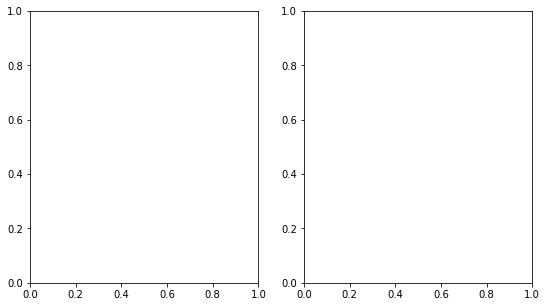

In [8]:
%matplotlib inline
from causallib.evaluation import evaluate

fig, axes = plt.subplots(1, 2, figsize=(9, 5))

eval_results = evaluate(ipw, X, a, y)
eval_results.plot_covariate_balance(kind="love", ax=axes[0], thresh=0.1);
eval_results.plot_weight_distribution(ax=axes[1]);

In [ ]:
indExclude = (X['cons.price.idx'] > 93.92) & (X['euribor3m'] > 1.41)

yy = y.loc[~indExclude]
aa = a.loc[~indExclude]
XX = X.loc[~indExclude]

In [ ]:
# lr = LogisticRegression(penalty="none", solver="saga", max_iter=5000)
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
ipw = IPW(lr)
ipw.fit(XX, aa, yy)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(9, 5))

eval_results = evaluate(ipw, XX, aa, yy)
eval_results.plot_covariate_balance(kind="love", ax=axes[0], thresh=0.1);
eval_results.plot_weight_distribution(ax=axes[1]);

# Students example

In [ ]:
def read_data_from_UCI():
    """Reads the bank-marketing data table from a zip file directly from UCI"""
    import zipfile
    import io
    from urllib import request

    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
    with request.urlopen(url) as r:
        with zipfile.ZipFile(io.BytesIO(r.read())) as zf:
            csv_file = zf.open("student/student.csv")
            df = pd.read_csv(csv_file, sep=";")
    return df

In [29]:
dataa = pd.read_csv(
    "C:\D\docs\interns_2022\Grace\student\student-mat.csv",
    sep=";",
)
dataa.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [30]:
dataa.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [37]:
a = dataa["absences"]
y = dataa["G1"]
X = dataa.drop(columns=['absences', 'G1', 'G2', 'G3'])
X = pd.get_dummies(X, drop_first=True)
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0


<AxesSubplot:ylabel='Frequency'>

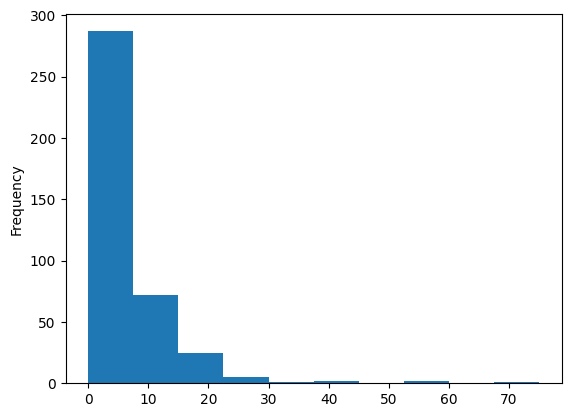

In [53]:
dataa["absences"].plot(kind="hist")

In [54]:
dataa["absences"].mean(), dataa["absences"].median()

(5.708860759493671, 4.0)

In [55]:
a = dataa["absences"] > dataa["absences"].median()
a = a.astype(int)

In [63]:
ipw = IPW(LogisticRegression(penalty="none", solver="saga", max_iter=4000))
ipw.fit(X, a, y)

IPW(clip_max=None, clip_min=None, use_stabilized=False, verbose=False,
    learner=LogisticRegression(max_iter=4000, penalty='none', solver='saga'))

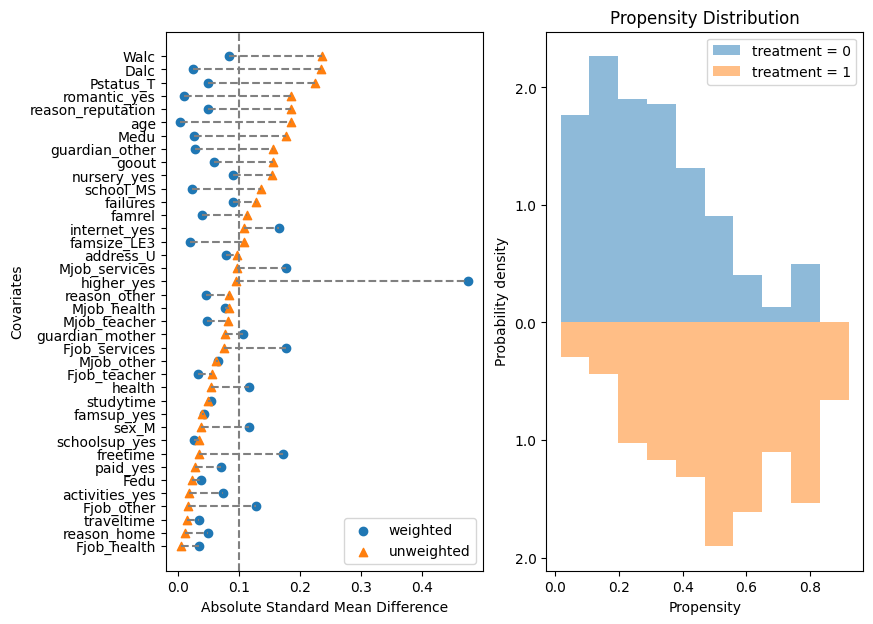

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(9, 7))

eval_results = evaluate(ipw, X, a, y, cv=None, metrics_to_evaluate=None)
eval_results.plot_covariate_balance(kind="love", ax=axes[0], thresh=0.1);
eval_results.plot_weight_distribution(ax=axes[1]);

In [65]:
ind_exclude = ipw.compute_propensity(X, a) >= 0.7

XX = X.loc[~ind_exclude]
aa = a.loc[~ind_exclude]
yy = y.loc[~ind_exclude]

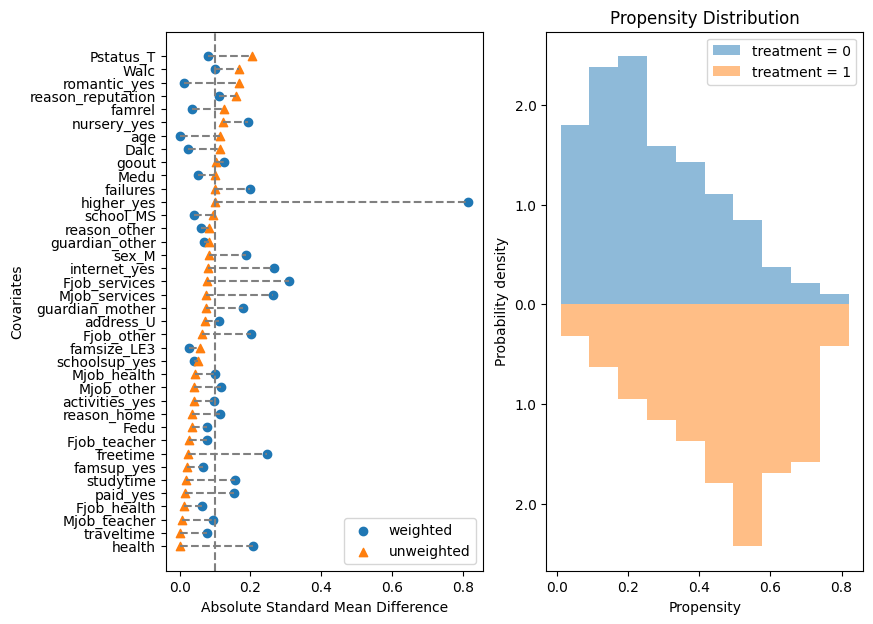

In [67]:
ipw = IPW(LogisticRegression(penalty="none", solver="saga", max_iter=4000))
ipw.fit(XX, aa, yy)


fig, axes = plt.subplots(1, 2, figsize=(9, 7))

eval_results = evaluate(ipw, XX, aa, yy, cv=None, metrics_to_evaluate=None)
eval_results.plot_covariate_balance(kind="love", ax=axes[0], thresh=0.1);
eval_results.plot_weight_distribution(ax=axes[1]);

## modeling G3 instead
since absences are throughout the year, so if we're modeling the first exam, the treatment assignment includes absences that have yet happened when the first exam took place

In [85]:
outliers = ["absences"] > 31
dataa_filtered = dataa.loc[~outliers]
a = dataa_filtered["absences"]
a = a >= a.median()
a = a.astype(int)
y = dataa_filtered["G3"]
X = dataa_filtered.drop(columns=['absences', 'G3'])
X = pd.get_dummies(X, drop_first=True)
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0


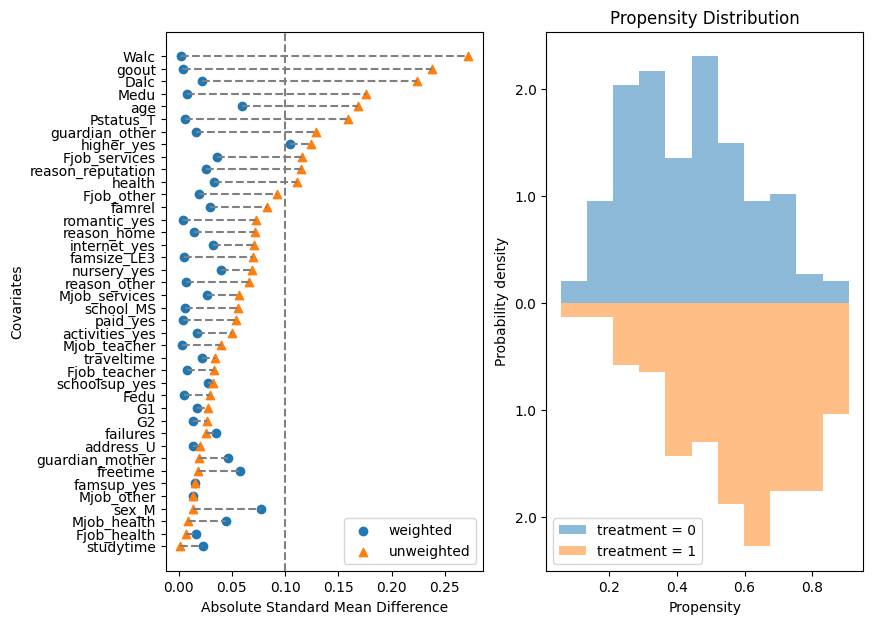

In [86]:
ipw = IPW(LogisticRegression(penalty="none", solver="saga", max_iter=4000))
ipw.fit(X, a, y)


fig, axes = plt.subplots(1, 2, figsize=(9, 7))

eval_results = evaluate(ipw, X, a, y, cv=None, metrics_to_evaluate=None)
eval_results.plot_covariate_balance(kind="love", ax=axes[0], thresh=0.1);
eval_results.plot_weight_distribution(ax=axes[1]);

In [87]:
ind_exclude = ipw.compute_propensity(X, a) < 0.1

XX = X.loc[~ind_exclude]
aa = a.loc[~ind_exclude]
yy = y.loc[~ind_exclude]

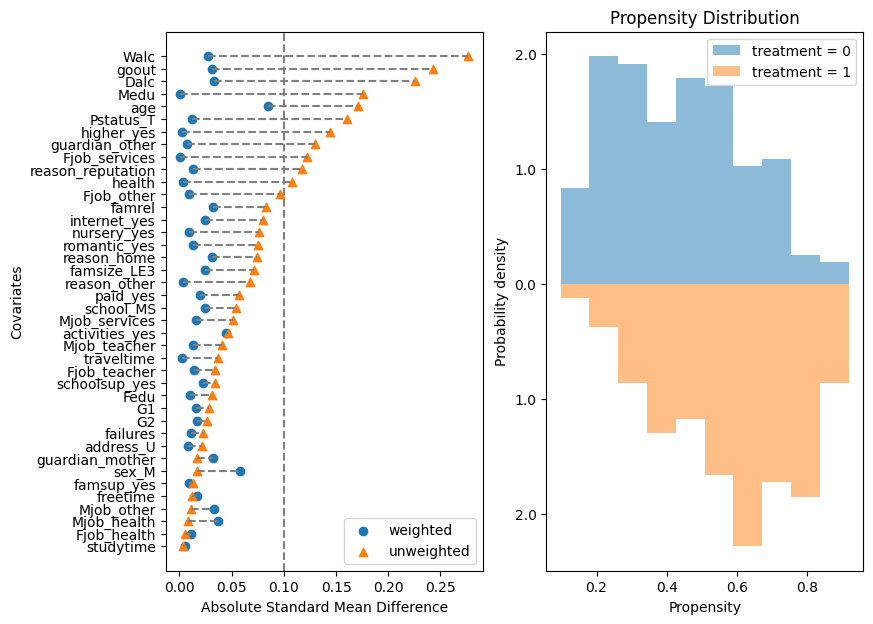

In [89]:
ipw = IPW(LogisticRegression(penalty="none", solver="saga", max_iter=4000))
ipw.fit(XX, aa, yy)


fig, axes = plt.subplots(1, 2, figsize=(9, 7))

eval_results = evaluate(ipw, XX, aa, yy, cv=None, metrics_to_evaluate=None)
eval_results.plot_covariate_balance(kind="love", ax=axes[0], thresh=0.1);
eval_results.plot_weight_distribution(ax=axes[1]);

In [90]:
o = ipw.estimate_population_outcome(XX, aa, yy)
o[1] - o[0]

1.3434582429109518

### Paid help

In [70]:
a = pd.Series(LabelEncoder().fit_transform(dataa["paid"]))
y = dataa["G1"]
X = dataa.drop(columns=['paid', 'G1', 'G2', 'G3'])
X = pd.get_dummies(X, drop_first=True)
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,0,1,0,1,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,0,1,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,0,1,0,1,0,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,0,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,0,1,0,1,1,0,0


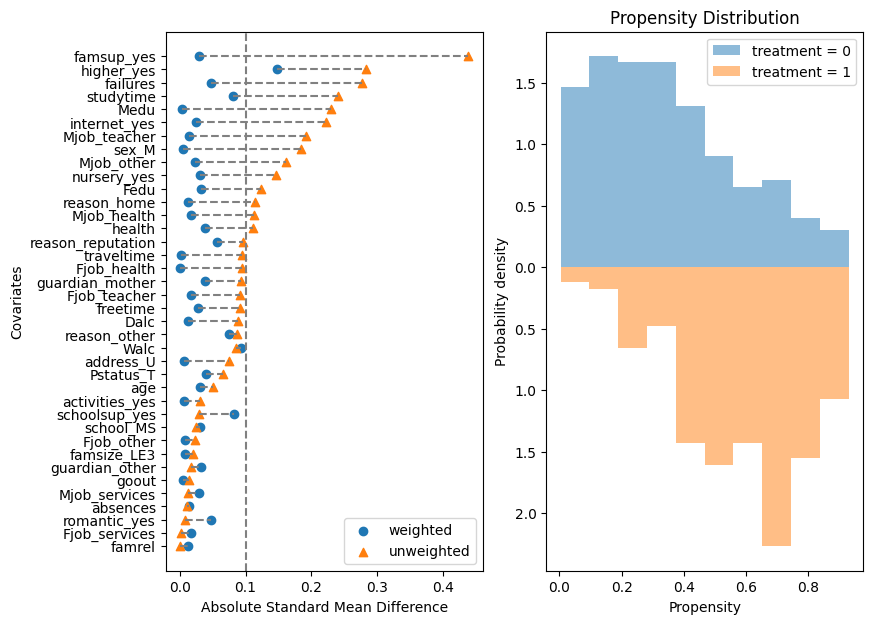

In [71]:
ipw = IPW(LogisticRegression(penalty="none", solver="saga", max_iter=4000))
ipw.fit(X, a, y)


fig, axes = plt.subplots(1, 2, figsize=(9, 7))

eval_results = evaluate(ipw, X, a, y, cv=None, metrics_to_evaluate=None)
eval_results.plot_covariate_balance(kind="love", ax=axes[0], thresh=0.1);
eval_results.plot_weight_distribution(ax=axes[1]);

In [77]:
ind_exclude = ipw.compute_propensity(X, a) < 0.15

XX = X.loc[~ind_exclude]
aa = a.loc[~ind_exclude]
yy = y.loc[~ind_exclude]

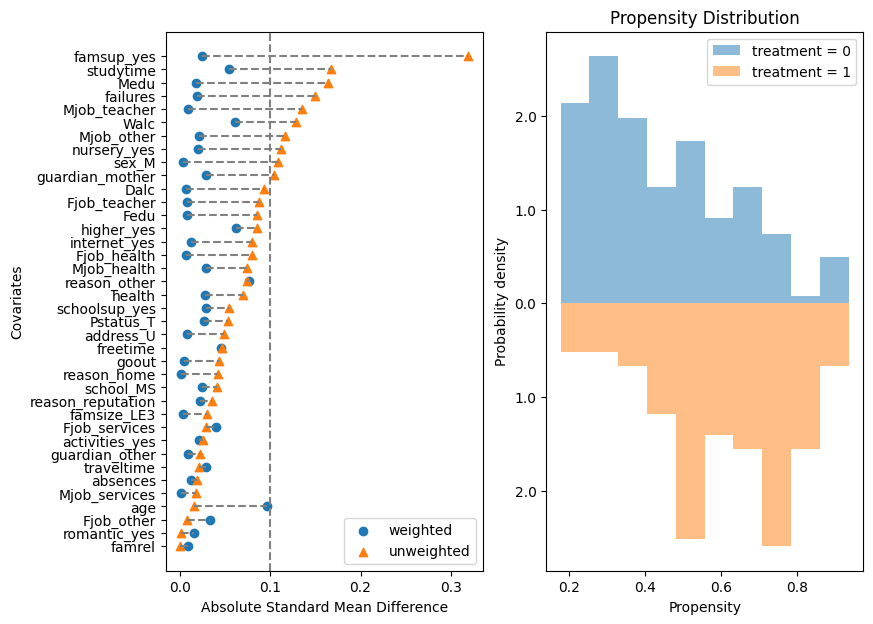

In [78]:
ipw = IPW(LogisticRegression(penalty="none", solver="saga", max_iter=4000))
ipw.fit(XX, aa, yy)


fig, axes = plt.subplots(1, 2, figsize=(9, 7))

eval_results = evaluate(ipw, XX, aa, yy, cv=None, metrics_to_evaluate=None)
eval_results.plot_covariate_balance(kind="love", ax=axes[0], thresh=0.1);
eval_results.plot_weight_distribution(ax=axes[1]);

# Student Portugese
as in causalnex

In [91]:
dataa = pd.read_csv(
    "C:\D\docs\interns_2022\Grace\student\student-por.csv",
    sep=";",
)
dataa.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [92]:
a = dataa["absences"]
y = dataa["G1"]
X = dataa.drop(columns=['absences', 'G1', 'G2', 'G3'])
X = pd.get_dummies(X, drop_first=True)
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,1,0,0,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,0,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,0,0,1,1,0,0


<AxesSubplot:ylabel='Frequency'>

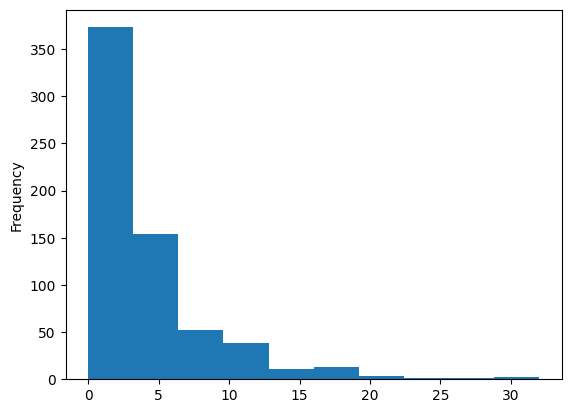

In [93]:
dataa["absences"].plot(kind="hist")

In [94]:
dataa["absences"].mean(), dataa["absences"].median()

(3.6594761171032357, 2.0)

In [102]:
outliers = dataa["absences"] > 25
dataa_filtered = dataa.loc[~outliers]
a = dataa_filtered["absences"]
a = a >= a.median()
a = a.astype(int)
# y = dataa_filtered["G3"]
# X = dataa_filtered.drop(columns=['absences', 'G3'])
y = dataa_filtered["G1"]
X = dataa_filtered.drop(columns=['absences', 'G1', 'G2', 'G3'])
X = pd.get_dummies(X, drop_first=True)
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,1,0,0,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,0,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,0,0,1,1,0,0


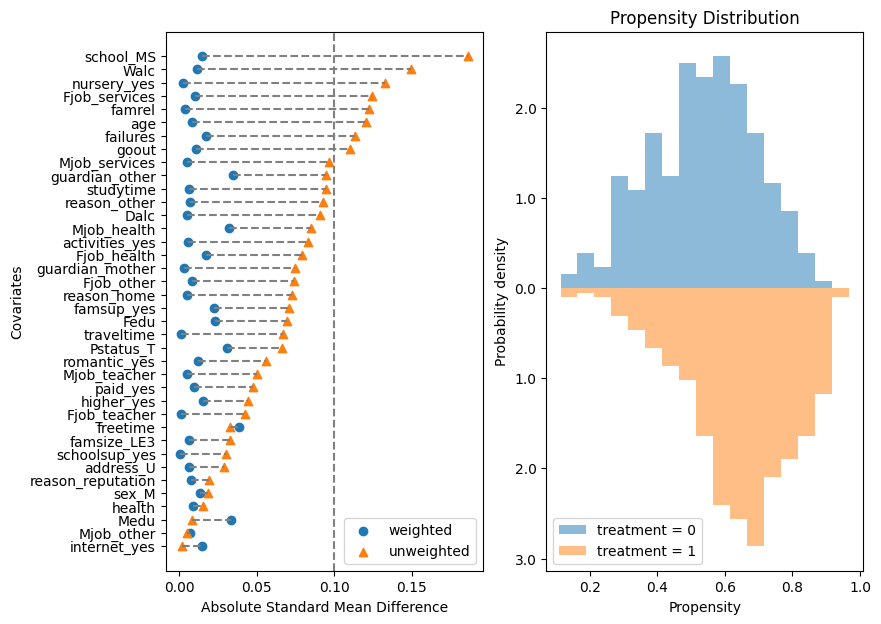

In [103]:
ipw = IPW(LogisticRegression(penalty="none", solver="saga", max_iter=4000))
ipw.fit(X, a, y)


fig, axes = plt.subplots(1, 2, figsize=(9, 7))

eval_results = evaluate(ipw, X, a, y, cv=None, metrics_to_evaluate=None)
eval_results.plot_covariate_balance(kind="love", ax=axes[0], thresh=0.1);
eval_results.plot_weight_distribution(ax=axes[1]);

In [104]:
ind_exclude = (ipw.compute_propensity(X, a) < 0.25) | (ipw.compute_propensity(X, a) > 0.95)

XX = X.loc[~ind_exclude]
aa = a.loc[~ind_exclude]
yy = y.loc[~ind_exclude]

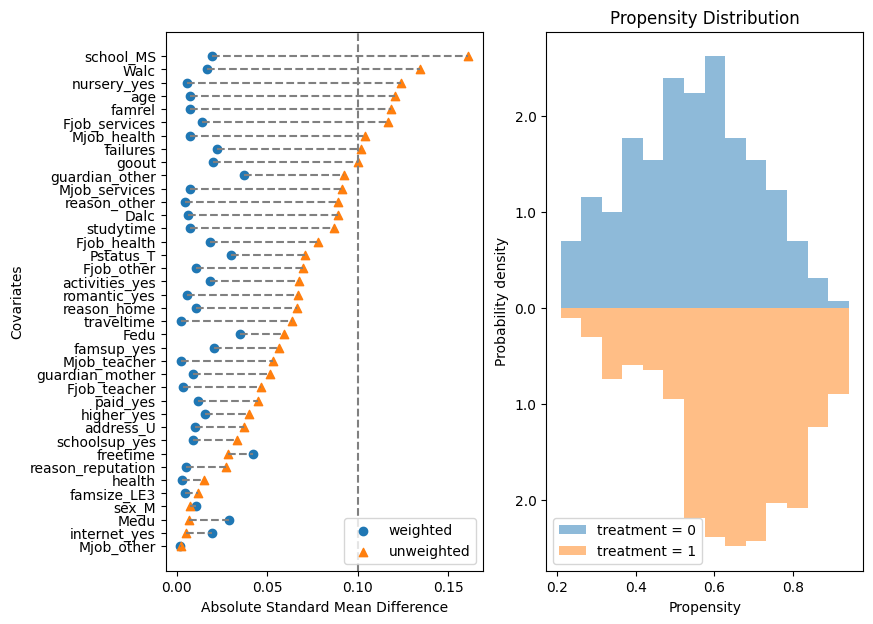

In [106]:
ipw = IPW(LogisticRegression(penalty="none", solver="saga", max_iter=4000))
ipw.fit(XX, aa, yy)


fig, axes = plt.subplots(1, 2, figsize=(9, 7))

eval_results = evaluate(ipw, XX, aa, yy, cv=None, metrics_to_evaluate=None)
eval_results.plot_covariate_balance(kind="love", ax=axes[0], thresh=0.1);
eval_results.plot_weight_distribution(ax=axes[1]);

### with dropping columns

In [107]:
outliers = dataa["absences"] > 25
dataa_filtered = dataa.loc[~outliers]
a = dataa_filtered["absences"]
a = a >= a.median()
a = a.astype(int)
# y = dataa_filtered["G3"]
# X = dataa_filtered.drop(columns=['absences', 'G3'])
y = dataa_filtered["G1"]
X = dataa_filtered.drop(columns=['absences', 'G1', 'G2', 'G3', 'school','sex','age','Mjob', 'Fjob','reason','guardian'])
X = pd.get_dummies(X, drop_first=True)
X.head()

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,...,famsize_LE3,Pstatus_T,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,4,4,2,2,0,4,3,4,1,1,...,0,0,1,0,0,0,1,1,0,0
1,1,1,1,2,0,5,3,3,1,1,...,0,1,0,1,0,0,0,1,1,0
2,1,1,1,2,0,4,3,2,2,3,...,1,1,1,0,0,0,1,1,1,0
3,4,2,1,3,0,3,2,2,1,1,...,0,1,0,1,0,1,1,1,1,1
4,3,3,1,2,0,4,3,2,1,2,...,0,1,0,1,0,0,1,1,0,0


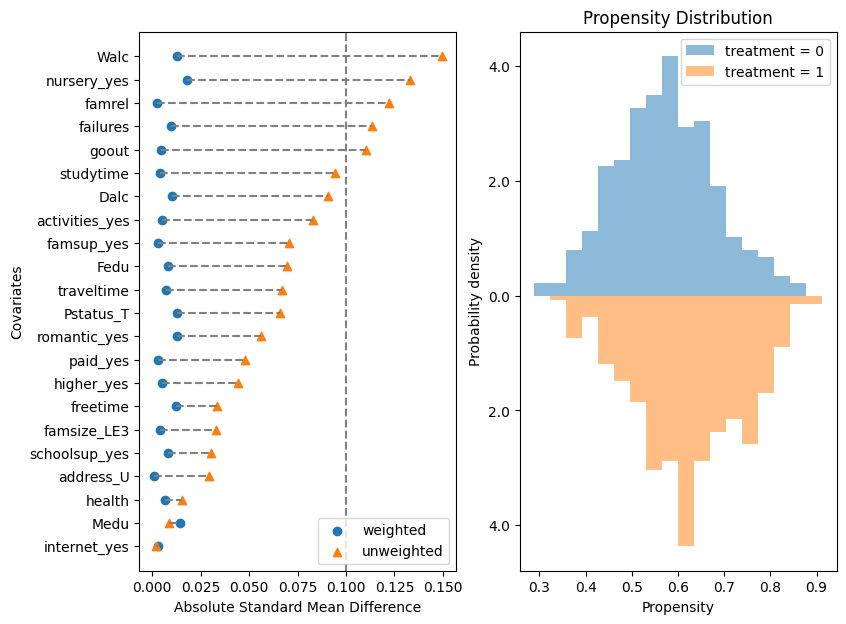

In [108]:
ipw = IPW(LogisticRegression(penalty="none", solver="saga", max_iter=4000))
ipw.fit(X, a, y)


fig, axes = plt.subplots(1, 2, figsize=(9, 7))

eval_results = evaluate(ipw, X, a, y, cv=None, metrics_to_evaluate=None)
eval_results.plot_covariate_balance(kind="love", ax=axes[0], thresh=0.1);
eval_results.plot_weight_distribution(ax=axes[1]);

In [109]:
ind_exclude = (ipw.compute_propensity(X, a) < 0.35) | (ipw.compute_propensity(X, a) > 0.85)

XX = X.loc[~ind_exclude]
aa = a.loc[~ind_exclude]
yy = y.loc[~ind_exclude]

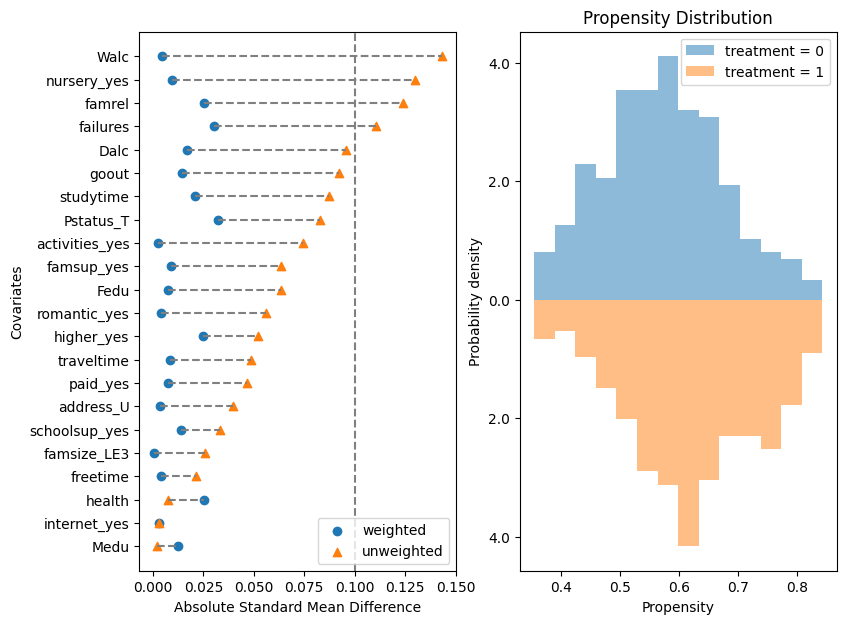

In [110]:
# ipw = IPW(LogisticRegression(penalty="none", solver="saga", max_iter=4000))
# ipw.fit(XX, aa, yy)


fig, axes = plt.subplots(1, 2, figsize=(9, 7))

eval_results = evaluate(ipw, XX, aa, yy, cv=None, metrics_to_evaluate=None)
eval_results.plot_covariate_balance(kind="love", ax=axes[0], thresh=0.1);
eval_results.plot_weight_distribution(ax=axes[1]);

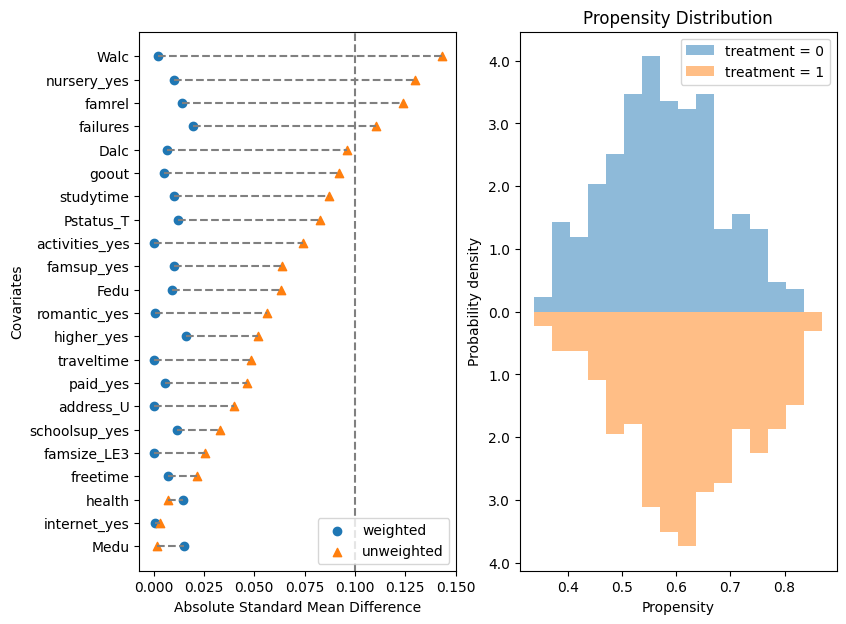

In [111]:
ipw = IPW(LogisticRegression(penalty="none", solver="saga", max_iter=4000))
ipw.fit(XX, aa, yy)


fig, axes = plt.subplots(1, 2, figsize=(9, 7))

eval_results = evaluate(ipw, XX, aa, yy, cv=None, metrics_to_evaluate=None)
eval_results.plot_covariate_balance(kind="love", ax=axes[0], thresh=0.1);
eval_results.plot_weight_distribution(ax=axes[1]);

### column Restricted but math

In [112]:
dataa = pd.read_csv(
    "C:\D\docs\interns_2022\Grace\student\student-mat.csv",
    sep=";",
)
dataa.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [113]:
outliers = dataa["absences"] > 30
dataa_filtered = dataa.loc[~outliers]
a = dataa_filtered["absences"]
a = a >= a.median()
a = a.astype(int)
# y = dataa_filtered["G3"]
# X = dataa_filtered.drop(columns=['absences', 'G3'])
y = dataa_filtered["G1"]
X = dataa_filtered.drop(columns=['absences', 'G1', 'G2', 'G3', 'school','sex','age','Mjob', 'Fjob','reason','guardian'])
X = pd.get_dummies(X, drop_first=True)
X.head()

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,...,famsize_LE3,Pstatus_T,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,4,4,2,2,0,4,3,4,1,1,...,0,0,1,0,0,0,1,1,0,0
1,1,1,1,2,0,5,3,3,1,1,...,0,1,0,1,0,0,0,1,1,0
2,1,1,1,2,3,4,3,2,2,3,...,1,1,1,0,1,0,1,1,1,0
3,4,2,1,3,0,3,2,2,1,1,...,0,1,0,1,1,1,1,1,1,1
4,3,3,1,2,0,4,3,2,1,2,...,0,1,0,1,1,0,1,1,0,0


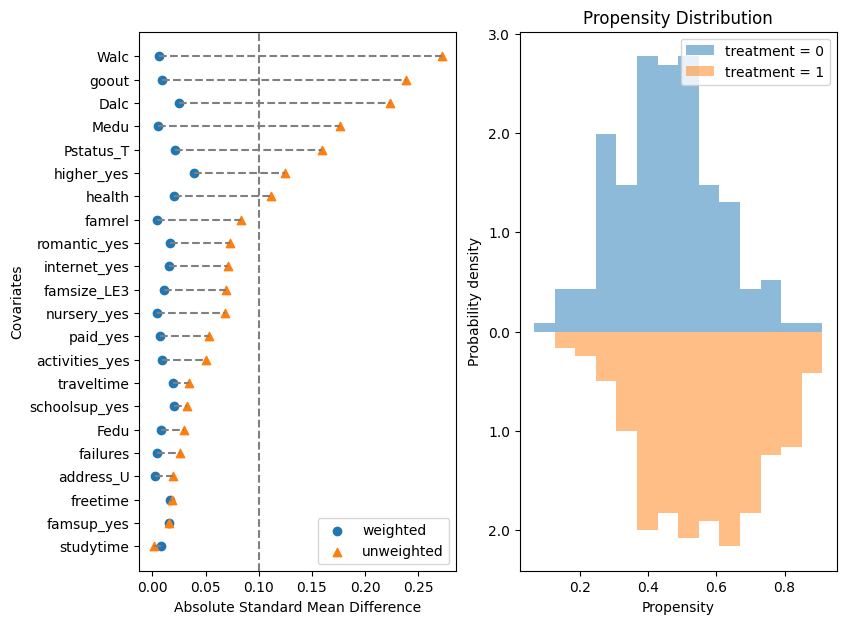

In [114]:
ipw = IPW(LogisticRegression(penalty="none", solver="saga", max_iter=4000))
ipw.fit(X, a, y)


fig, axes = plt.subplots(1, 2, figsize=(9, 7))

eval_results = evaluate(ipw, X, a, y, cv=None, metrics_to_evaluate=None)
eval_results.plot_covariate_balance(kind="love", ax=axes[0], thresh=0.1);
eval_results.plot_weight_distribution(ax=axes[1]);

In [118]:
ind_exclude = (ipw.compute_propensity(X, a) < 0.15) # | (ipw.compute_propensity(X, a) > 0.82)

XX = X.loc[~ind_exclude]
aa = a.loc[~ind_exclude]
yy = y.loc[~ind_exclude]

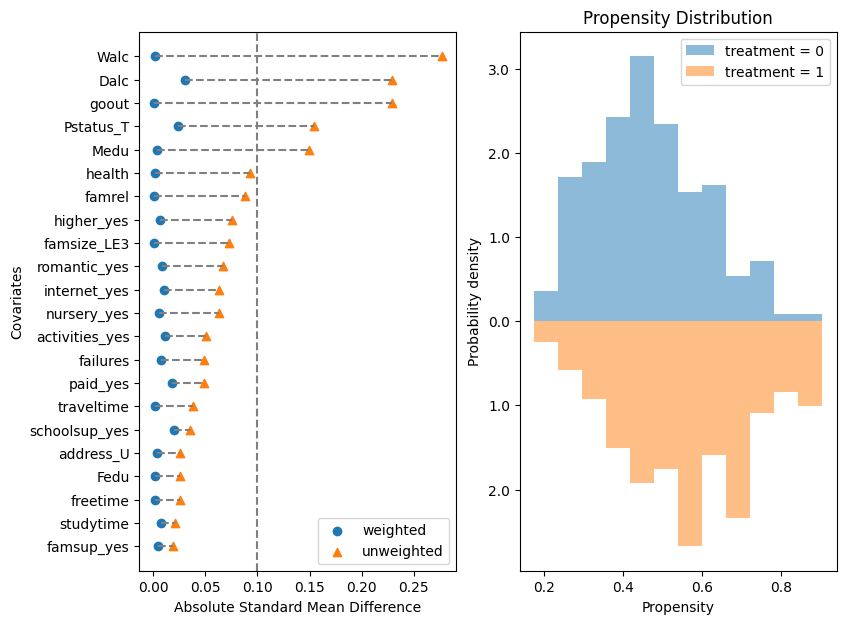

In [119]:
ipw = IPW(LogisticRegression(penalty="none", solver="saga", max_iter=4000))
ipw.fit(XX, aa, yy)


fig, axes = plt.subplots(1, 2, figsize=(9, 7))

eval_results = evaluate(ipw, XX, aa, yy, cv=None, metrics_to_evaluate=None)
eval_results.plot_covariate_balance(kind="love", ax=axes[0], thresh=0.1);
eval_results.plot_weight_distribution(ax=axes[1]);

In [161]:
X = dataa_filtered.loc[:, [
    "schoolsup", "studytime", "higher", "paid", "internet", "Pstatus", "failures", 
    "famsup", # conf
    "health",
    "Fedu", "Medu",  # Parents(absence, higher)
    # "freetime",
    # "age",
]]
X = pd.get_dummies(X, drop_first=True)

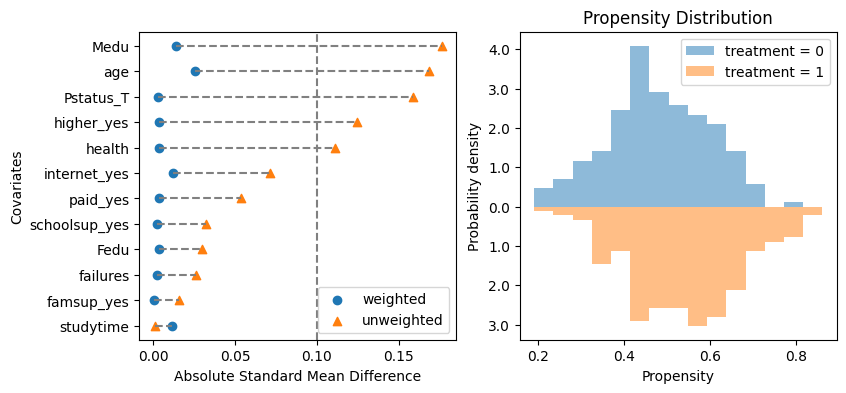

In [162]:
ipw = IPW(LogisticRegression(penalty="none", solver="saga", max_iter=4000))
ipw.fit(X, a, y)


fig, axes = plt.subplots(1, 2, figsize=(9, 4))

eval_results = evaluate(ipw, X, a, y, cv=None, metrics_to_evaluate=None)
eval_results.plot_covariate_balance(kind="love", ax=axes[0], thresh=0.1);
eval_results.plot_weight_distribution(ax=axes[1]);

In [155]:
ind_exclude = (ipw.compute_propensity(X, a) < 0.3) | (ipw.compute_propensity(X, a) > 0.75)

XX = X.loc[~ind_exclude]
aa = a.loc[~ind_exclude]
yy = y.loc[~ind_exclude]

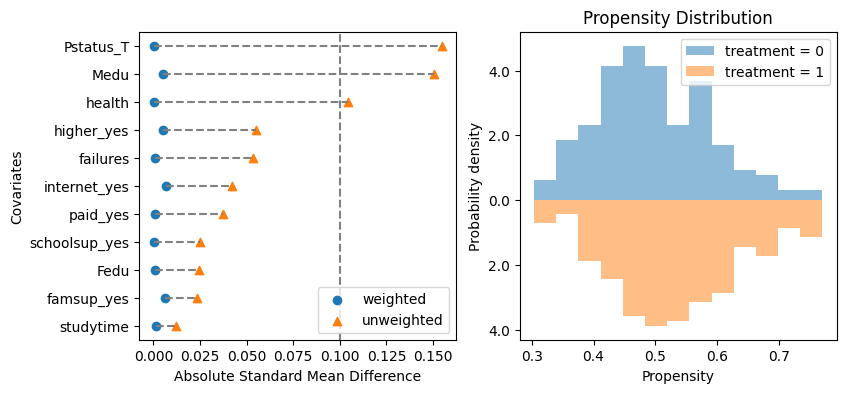

In [156]:
ipw = IPW(LogisticRegression(penalty="none", solver="saga", max_iter=4000))
ipw.fit(XX, aa, yy)


fig, axes = plt.subplots(1, 2, figsize=(9, 4))

eval_results = evaluate(ipw, XX, aa, yy, cv=None, metrics_to_evaluate=None)
eval_results.plot_covariate_balance(kind="love", ax=axes[0], thresh=0.1);
eval_results.plot_weight_distribution(ax=axes[1]);